# Intro till pandas
- Series object
- DataFrame object

In [183]:
import pandas as pd

data = dict(AI = 25, NET = 30, APP = 27, Java = 23)
series = pd.Series(data = data)
series

AI      25
NET     30
APP     27
Java    23
dtype: int64

In [184]:
# Extracting values
print(f"series[0]: {series[0]}")
print(f"series[-1]: {series[-1]}")

# Extract keys
print(f"series.keys(): {series.keys()}")
print(f"series.keys()[-2]: {series.keys()[-2]}")

series[0]: 25
series[-1]: 23
series.keys(): Index(['AI', 'NET', 'APP', 'Java'], dtype='object')
series.keys()[-2]: APP


## DataFrame

In [185]:
df = pd.DataFrame(series)
df

,0
AI,25
NET,30
APP,27
Java,23


In [186]:
df = pd.DataFrame(series, columns=("Numer students",))
df

,Numer students
AI,25
NET,30
APP,27
Java,23


In [187]:
languages = pd.Series(dict(AI = "Python", NET = "C#", APP = "Kotlin", Java = "JAVA"))
df = pd.DataFrame({"Students":series, "Language":languages})
df

,Students,Language
AI,25,Python
NET,30,C#
APP,27,Kotlin
Java,23,JAVA


In [188]:
df.index    # get all indexs

Index(['AI', 'NET', 'APP', 'Java'], dtype='object')

## Data Selection

In [189]:
df.Students     # gets a Series with attribute-approach

AI      25
NET     30
APP     27
Java    23
Name: Students, dtype: int64

In [190]:
df["Students"]      # gets a Series with dictionary-keys approach

AI      25
NET     30
APP     27
Java    23
Name: Students, dtype: int64

In [191]:
# multiple columns
df[["Language", "Students"]]

,Language,Students
AI,Python,25
NET,C#,30
APP,Kotlin,27
Java,JAVA,23


In [192]:
# wants to get all rows > 24 students
df["Students"] > 24

# masking
large_groups = df[df["Students"] > 24]     # all rows that are true in df["Students"] > 24
large_groups

,Students,Language
AI,25,Python
NET,30,C#
APP,27,Kotlin


In [193]:
large_groups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, AI to APP
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Students  3 non-null      int64 
 1   Language  3 non-null      object
dtypes: int64(1), object(1)
memory usage: 72.0+ bytes


Text(0.5, 1.0, 'Antal Studenter i olika program')

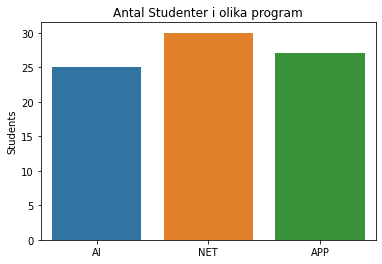

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = large_groups, x = large_groups.index, y = "Students")
plt.title("Antal Studenter i olika program")       # can also use seaboarns methods for this

In [195]:
# Read Excel

calories = pd.read_excel("data/calories.xlsx")
calories.head()     # can choose how many

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [196]:
calories.iloc[3:9]      # index 3 to 8

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
5,CannedFruit,Canned Cranberries,100g,178 cal,748 kJ
6,CannedFruit,Canned Crushed Pineapple,100g,53 cal,223 kJ
7,CannedFruit,Canned Figs,100g,107 cal,449 kJ
8,CannedFruit,Canned Fruit Cocktail,100g,81 cal,340 kJ


In [197]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [198]:
calories.describe()     # gives statistics on DataFrame

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
count,2225,2225,2225,2225,2225
unique,44,1993,2,524,524
top,BakingIngredients,Roast Beef,100g,100 cal,420 kJ
freq,95,4,1802,26,26


In [199]:
calories["FoodCategory"].unique()

array(['CannedFruit', 'Fruits', 'Tropical&ExoticFruits', 'PotatoProducts',
       'Vegetables', 'FastFood', 'Pizza', 'Cheese', 'CreamCheese',
       'Milk&DairyProducts', 'SlicedCheese', 'Yogurt', 'Beef&Veal',
       'ColdCuts&LunchMeat', 'Meat', 'Offal&Giblets', 'Pork',
       'Poultry&Fowl', 'Sausage', 'Venison&Game', 'Cakes&Pies',
       'Candy&Sweets', 'IceCream', '(Fruit)Juices',
       'AlcoholicDrinks&Beverages', 'Beer',
       'Non-AlcoholicDrinks&Beverages', 'Soda&SoftDrinks', 'Wine',
       'CerealProducts', 'Oatmeal,Muesli&Cereals', 'Pasta&Noodles',
       'Dishes&Meals', 'Soups', 'Legumes', 'Nuts&Seeds', 'Oils&Fats',
       'VegetableOils', 'BakingIngredients', 'Fish&Seafood',
       'Herbs&Spices', 'Pastries,Breads&Rolls', 'Sauces&Dressings',
       'Spreads'], dtype=object)

In [200]:
calories.columns

Index(['FoodCategory', 'FoodItem', 'per100grams', 'Cals_per100grams',
       'KJ_per100grams'],
      dtype='object')

In [201]:
calories["per100grams"].unique()

array(['100g', '100ml'], dtype=object)

## Data cleaning

- convert String to int
- change column names
- seperate liquids and solids

In [202]:
calories = calories.rename(dict(Cals_per100grams = "Calories", per100grams = "per100"), axis = "columns")
calories.tail()

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ
2221,Spreads,Tapenade,100g,233 cal,979 kJ
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2223,Spreads,Vegemite,100g,180 cal,756 kJ
2224,Spreads,Wild Honey,100g,286 cal,1201 kJ


In [203]:
calories["Calories"] = calories["Calories"].str[:-3].astype(int)
calories.head()

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


In [205]:
calories["per100"].value_counts()

100g     1802
100ml     423
Name: per100, dtype: int64

In [215]:
solids = calories[calories["per100"] == "100g"]
liquids = calories[calories["per100"] == "100ml"]
liquids.head()

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
409,Milk&DairyProducts,Almond Milk,100ml,17,71 kJ
410,Milk&DairyProducts,Buttermilk,100ml,62,260 kJ
412,Milk&DairyProducts,Coconut Milk,100ml,230,966 kJ
422,Milk&DairyProducts,Hot Chocolate,100ml,89,374 kJ
423,Milk&DairyProducts,Kefir,100ml,55,231 kJ


## Find top 5 categories with highest calories

In [222]:
solids_top5 = solilds.sort_values(by = "Calories", ascending = False).head()
solids_top5

liquids_top5 = liquids.sort_values(by = "Calories", ascending = False).head()
liquids_top5

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
1751,Oils&Fats,Cod Liver Oil,100ml,1000,4200 kJ
1808,VegetableOils,Wheat Germ Oil,100ml,929,3902 kJ
1800,VegetableOils,Salmon Oil,100ml,911,3826 kJ
1789,VegetableOils,Menhaden Oil,100ml,911,3826 kJ
1759,Oils&Fats,Herring Oil,100ml,902,3788 kJ


<AxesSubplot:xlabel='FoodItem', ylabel='Calories'>

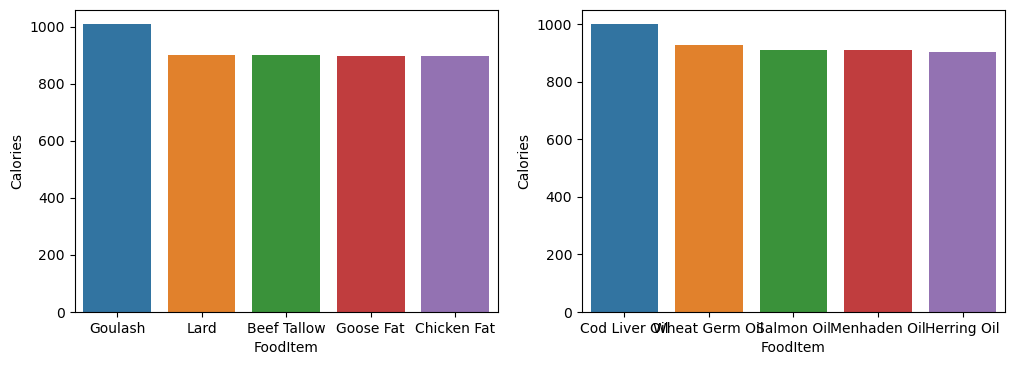

In [233]:
fig, ax = plt.subplots(1, 2, dpi = 100, figsize = (12, 4))
sns.barplot(data = solids_top5, x = "FoodItem", y = "Calories", ax = ax[0])
sns.barplot(data = liquids_top5, x = "FoodItem", y = "Calories", ax = ax[1])